In [19]:
import sys
sys.path.append("./tools")

In [20]:
import numpy as np

import qiskit
from qiskit import QuantumCircuit
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
palette = {
    'unitary': '#FF9966', 'vqc': '#66CC99', 
}

In [23]:
%matplotlib inline

In [24]:
%%html
<style>
table {float:left;}
</style>

## Tool Modules

In [25]:
from quantum import *
from measurements import *

from unitary import *
from VQC import *

from dataSL import *
from QOLearner import *

from noise import *
from lipschitz import *

## Prepare Circuits

### - Input Circuits

In [26]:
def initCircuit(n=4):
    circuit = QuantumCircuit(n, n)
    
    for i in range(n):
        circuit.h(i)
        circuit.barrier(i)
    
    return circuit

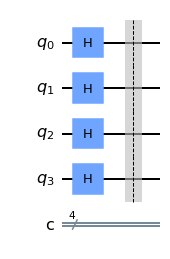

In [27]:
inputCircuit = initCircuit()
inputCircuit.draw(output='mpl')

### - Output Circuits

In [28]:
def cnx(qc, *qubits):
    if len(qubits) >= 3:
        last = qubits[-1]
        # A matrix: (made up of a  and Y rotation, lemma4.3)
        qc.crz(np.pi/2, qubits[-2], qubits[-1])
        qc.cu3(np.pi/2, 0, 0, qubits[-2],qubits[-1])
        
        # Control not gate
        cnx(qc,*qubits[:-2],qubits[-1])
        
        # B matrix (pposite angle)
        qc.cu3(-np.pi/2, 0, 0, qubits[-2], qubits[-1])
        
        # Control
        cnx(qc,*qubits[:-2],qubits[-1])
        
        # C matrix (final rotation)
        qc.crz(-np.pi/2,qubits[-2],qubits[-1])
    elif len(qubits)==3:
        qc.ccx(*qubits)
    elif len(qubits)==2:
        qc.cx(*qubits)

In [29]:
def createDiffuser():
    circuit = QuantumCircuit(4, 4)
    
    # diffuser
    circuit.h(2)
    circuit.h(0)
    circuit.h(1)
    circuit.h(3)
    circuit.x(3)
    circuit.x(2)
    circuit.x(0)
    circuit.x(1)
    circuit.barrier()
    circuit.h(3)
    cnx(circuit, 0, 1, 2, 3)
    circuit.h(3)
    circuit.barrier()
    circuit.x(3)
    circuit.x(2)
    circuit.x(0)
    circuit.x(1)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.h(3)
    
    return circuit

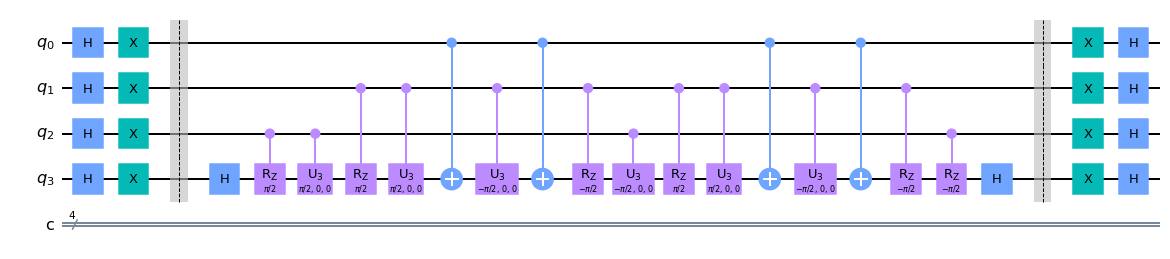

In [30]:
diffuserCircuit = createDiffuser()
diffuserCircuit.draw(output='mpl')

## Train paramters

In [31]:
import time
import sys
stdout = sys.stdout

In [32]:
# experiments times
MAX_TIMES = 10

### - expecetd

In [33]:
# 2 3 5 7 11 13 
expected = {"0010":1, "0011":1, "0101":1, "0111":1, "1011":1, "1101": 1}

## Strategy: unitary

In [34]:
qol_unitary = QOLearnerBase([inputCircuit, diffuserCircuit], 4, [0, 1, 2, 3], expected)

In [17]:
times_unitary = []

for i in range(MAX_TIMES):
    start = time.perf_counter()
    qol_unitary.fit(epoch=1000, strategy='unitary', stepsize=0.003, early_stopping=True)
    end = time.perf_counter()
    times_unitary.append(end - start)
    
    print(f'Fin - No. {i + 1}')
    
    saveParams(qol_unitary.params[-1], 'toy', 'unitary', i + 1)
    saveLosses(qol_unitary.losses, 'toy', 'unitary', i + 1)

epoch: [1/1000] - loss: (0.007043353231205516+0j) end.
epoch: [2/1000] - loss: (0.006182101017773006+0j) end.
epoch: [3/1000] - loss: (0.005414925337519737+0j) end.
epoch: [4/1000] - loss: (0.004734402611813649+0j) end.
epoch: [5/1000] - loss: (0.004130454576061362+0j) end.
epoch: [6/1000] - loss: (0.0035948418267680686+0j) end.
epoch: [7/1000] - loss: (0.0031228773348283777+0j) end.
epoch: [8/1000] - loss: (0.002711986718238208+0j) end.
epoch: [9/1000] - loss: (0.0023601514155698173+0j) end.
epoch: [10/1000] - loss: (0.0020642844833627452+0j) end.
epoch: [11/1000] - loss: (0.0018186018954331861+0j) end.
epoch: [12/1000] - loss: (0.0016137093227838741+0j) end.
epoch: [13/1000] - loss: (0.0014370268630211093+0j) end.
epoch: [14/1000] - loss: (0.0012744348795208722+0j) end.
epoch: [15/1000] - loss: (0.001113270257445988+0j) end.
epoch: [16/1000] - loss: (0.0009456872202929174+0j) end.
epoch: [17/1000] - loss: (0.0007709316196028935+0j) end.
epoch: [18/1000] - loss: (0.0005957439301172522

epoch: [11/1000] - loss: (0.0027761304036093438+0j) end.
epoch: [12/1000] - loss: (0.0023643627687541732+0j) end.
epoch: [13/1000] - loss: (0.002007381348154061+0j) end.
epoch: [14/1000] - loss: (0.0017035373375403225+0j) end.
epoch: [15/1000] - loss: (0.0014483163562274796+0j) end.
epoch: [16/1000] - loss: (0.0012351352253586712+0j) end.
epoch: [17/1000] - loss: (0.0010568089716877554+0j) end.
epoch: [18/1000] - loss: (0.0009069372328206433+0j) end.
epoch: [19/1000] - loss: (0.000780778051681287+0j) end.
epoch: [20/1000] - loss: (0.0006753353536377202+0j) end.
epoch: [21/1000] - loss: (0.0005887257213742065+0j) end.
epoch: [22/1000] - loss: (0.0005191769172948218+0j) end.
epoch: [23/1000] - loss: (0.00046416906341504986+0j) end.
epoch: [24/1000] - loss: (0.0004201479947635298+0j) end.
epoch: [25/1000] - loss: (0.0003829419638487808+0j) end.
epoch: [26/1000] - loss: (0.0003486263899807572+0j) end.
epoch: [27/1000] - loss: (0.0003143675262749764+0j) end.
epoch: [28/1000] - loss: (0.0002

epoch: [14/1000] - loss: (0.0010861144093398387+0j) end.
epoch: [15/1000] - loss: (0.0009269834903924233+0j) end.
epoch: [16/1000] - loss: (0.0008035763920630368+0j) end.
epoch: [17/1000] - loss: (0.0007085321067097886+0j) end.
epoch: [18/1000] - loss: (0.0006332666832084543+0j) end.
epoch: [19/1000] - loss: (0.000569569410322633+0j) end.
epoch: [20/1000] - loss: (0.0005112961784740015+0j) end.
epoch: [21/1000] - loss: (0.0004552652324452949+0j) end.
epoch: [22/1000] - loss: (0.000401020406353666+0j) end.
epoch: [23/1000] - loss: (0.0003497678091210575+0j) end.
epoch: [24/1000] - loss: (0.0003031111552428188+0j) end.
epoch: [25/1000] - loss: (0.00026210395589008927+0j) end.
epoch: [26/1000] - loss: (0.00022687937397266664+0j) end.
epoch: [27/1000] - loss: (0.00019686886862880238+0j) end.
epoch: [28/1000] - loss: (0.00017133143632728893+0j) end.
epoch: [29/1000] - loss: (0.00014981656041424007+0j) end.
epoch: [30/1000] - loss: (0.00013228446672497508+0j) end.
epoch: [31/1000] - loss: (0

In [18]:
print(f'Average times for unitary: {np.mean(times_unitary)}')

Average times for unitary: 148.28757260999996


### - plot a loss example

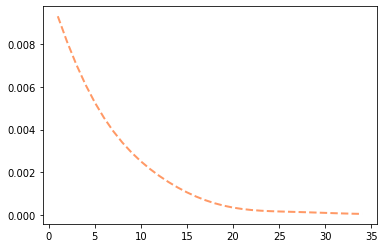

In [19]:
plot(loadLosses('toy', 'unitary', 3), color=palette['unitary'])

In [16]:
losses_unitary= []
max_length = 0
for i in range(MAX_TIMES):
    losses_unitary.append(loadLosses('toy', 'unitary', i + 1))
    max_length = max(max_length, len(losses_unitary[-1]))

for i in range(MAX_TIMES):
    length = len(losses_unitary[i])
    while length < max_length:
        losses_unitary[i].append(losses_unitary[i][-1])
        length += 1

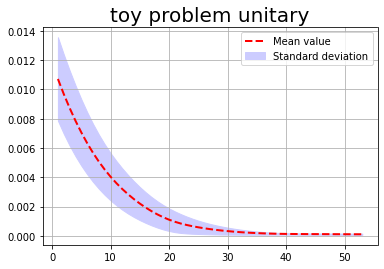

In [21]:
plotLosses(losses_unitary, title='toy problem unitary')

### - average time and loss

In [22]:
average_loss_unitary = 0.0
for i in range(MAX_TIMES):
    loss = loadLosses('toy', 'unitary', i + 1)[-1]
    average_loss_unitary += loss
print(f'Average loss for unitary: {average_loss_unitary / MAX_TIMES}')

Average loss for unitary: (0.00010967805667034608+0j)


In [23]:
average_epoch_unitary = 0
for i in range(MAX_TIMES):
    loss = loadLosses('toy', 'unitary', i + 1)
    average_epoch_unitary += len(loss)
print(f'Average epoch for unitary: {average_epoch_unitary / MAX_TIMES}')

Average epoch for unitary: 37.0


In [24]:
average_time_unitary = 148.28757260999996

In [35]:
average_time_per_epoch_unitary = average_time_unitary / average_epoch_unitary
print(f'Average time per epoch for unitary: {average_time_per_epoch_unitary}')

Average time per epoch for unitary: 0.3804518092113564


|Strategy| parameterized unitary |
|:----------------:|:-----:|
| Average loss | 1.097e-4 |
| Average time | 148.3 |
| Average epochs | 37.0 |
| Average time per epoch | 0.3805 |

## Strategy: VQC

In [196]:
qol_vqc = QOLearnerBase([inputCircuit, diffuserCircuit], 4, [0, 1, 2, 3], expected)

In [220]:
qol_vqc.fit(epoch=1000, strategy='vqc', stepsize=0.01, early_stopping=True)

epoch: [1/1000] - loss: (0.00814734659402357+0j) end.
epoch: [2/1000] - loss: (0.007871315838155894+0j) end.
epoch: [3/1000] - loss: (0.007607212105515046+0j) end.
epoch: [4/1000] - loss: (0.007354802004871753+0j) end.
epoch: [5/1000] - loss: (0.007113305326841127+0j) end.
epoch: [6/1000] - loss: (0.006882554408838917+0j) end.
epoch: [7/1000] - loss: (0.006662955951003656+0j) end.
epoch: [8/1000] - loss: (0.006454927793933491+0j) end.
epoch: [9/1000] - loss: (0.006258553968668395+0j) end.
epoch: [10/1000] - loss: (0.006073429192691373+0j) end.
epoch: [11/1000] - loss: (0.005898667392656553+0j) end.
epoch: [12/1000] - loss: (0.005733084455266987+0j) end.
epoch: [13/1000] - loss: (0.005575470518889975+0j) end.
epoch: [14/1000] - loss: (0.005424800872657117+0j) end.
epoch: [15/1000] - loss: (0.005280314648958043+0j) end.
epoch: [16/1000] - loss: (0.005141506563962697+0j) end.
epoch: [17/1000] - loss: (0.005008089886486734+0j) end.
epoch: [18/1000] - loss: (0.004879948990833037+0j) end.
ep

In [200]:
times_vqc = []

for i in range(MAX_TIMES):
    start = time.perf_counter()
    qol_vqc.fit(epoch=1000, strategy='vqc', stepsize=0.001, early_stopping=True)
    end = time.perf_counter()
    times_vqc.append(end - start)
    print(f'Fin - No. {i + 1}')
    
    saveParams(qol_vqc.params[-1], 'toy', 'vqc', i + 1)
    saveLosses(qol_vqc.losses, 'toy', 'vqc', i + 1)

epoch: [1/1000] - loss: (0.013419930998756047+0j) end.
epoch: [2/1000] - loss: (0.013358830058539052+0j) end.
epoch: [3/1000] - loss: (0.013297799948928516+0j) end.
epoch: [4/1000] - loss: (0.013236845930702986+0j) end.
epoch: [5/1000] - loss: (0.013175973221258302+0j) end.
epoch: [6/1000] - loss: (0.013115186996458857+0j) end.
epoch: [7/1000] - loss: (0.01305449239184994+0j) end.
epoch: [8/1000] - loss: (0.012993894503272+0j) end.
epoch: [9/1000] - loss: (0.012933398386931784+0j) end.
epoch: [10/1000] - loss: (0.012873009058990916+0j) end.
epoch: [11/1000] - loss: (0.012812731494734183+0j) end.
epoch: [12/1000] - loss: (0.012752570627378576+0j) end.
epoch: [13/1000] - loss: (0.012692531346580606+0j) end.
epoch: [14/1000] - loss: (0.012632618496696545+0j) end.
epoch: [15/1000] - loss: (0.012572836874845039+0j) end.
epoch: [16/1000] - loss: (0.01251319122881775+0j) end.
epoch: [17/1000] - loss: (0.012453686254879356+0j) end.
epoch: [18/1000] - loss: (0.012394326595493157+0j) end.
epoch:

KeyboardInterrupt: 

In [38]:
print(f'Average times for vqc: {np.mean(times_vqc)}')

Average times for vqc: 67.84420188999998


### - plot a loss example

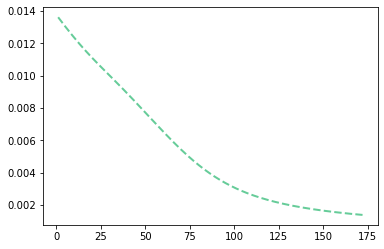

In [39]:
plot(loadLosses('toy', 'vqc', 1), color=palette['vqc'])

In [17]:
losses_vqc= []
max_length = 0
for i in range(10):
    losses_vqc.append(loadLosses('toy', 'vqc', i + 1))
    max_length = max(max_length, len(losses_vqc[-1]))

for i in range(10):
    length = len(losses_vqc[i])
    while length < max_length:
        losses_vqc[i].append(losses_vqc[i][-1])
        length += 1

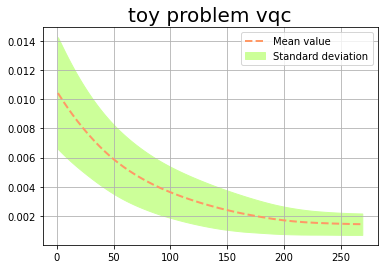

In [31]:
plotLosses(losses_vqc, color="#FF9966", fill_color="#CCFF99", title="toy problem vqc")

### - average time and loss

In [42]:
average_loss_vqc = 0.0
for i in range(MAX_TIMES):
    loss = loadLosses('toy', 'vqc', i + 1)[-1]
    average_loss_vqc += loss
print(f'Average loss for vqc: {average_loss_vqc / MAX_TIMES}')

Average loss for vqc: (0.0013356027413743777+0j)


In [43]:
average_epoch_vqc = 0
for i in range(MAX_TIMES):
    loss = loadLosses('toy', 'vqc', i + 1)
    average_epoch_vqc += len(loss)
print(f'Average epoch for vqc: {average_epoch_vqc / MAX_TIMES}')

Average epoch for vqc: 186.5


In [44]:
average_time_vqc = 67.84420188999998

In [45]:
average_time_per_epoch_vqc = average_time_vqc / average_epoch_vqc
print(f'Average time per epoch for vqc: {average_time_per_epoch_vqc}')

Average time per epoch for vqc: 0.036377588144772106


| Strategy | VQC |
|:----------------:|:-----:|
| Average loss | 1.336e-3 |
| Average time | 67.84 |
| Average epochs | 186.5 |
| Average time per epoch | 0.03638 |

##  Summarize

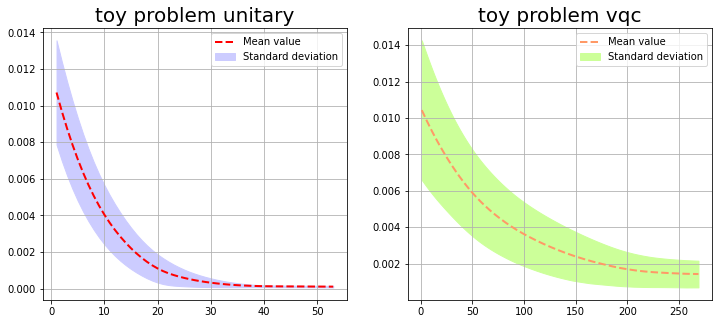

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plotLosses(losses_unitary, title="toy problem unitary")
plt.subplot(1,2,2)
plotLosses(losses_vqc, color="#FF9966", fill_color="#CCFF99", title="toy problem vqc")

In [18]:
len(loadParams('toy', 'unitary', 1))

256

In [19]:
len(loadParams('toy', 'vqc', 1))

24

|Indicators| PUG|VQC |
|:----------------:|:-----:|:-----:|
| Average loss | 1.097e-4 |1.336e-3 |
| Average time | 148.3 | 67.84 |
| Average epochs | 37.0 | 186.5 |
| Average time per epoch | 0.3805 |0.03638 |
| Total parameters| 256 | 24 |

## Compare Lipschitz

In [35]:
measurements = getMeasurements(4)

In [36]:
names = ['unitary', 'vqc']

In [37]:
error_params = [
    [0.0001 , 'b'], [0.0001 , 'p'], [0.0001 , 'd'], 
    [0.001 , 'b'], [0.001 , 'p'], [0.001 , 'd'], 
    [0.01 , 'b'], [0.01 , 'p'], [0.01 , 'd'],
    [0.1 , 'b'], [0.1 , 'p'], [0.1 , 'd'], 
]

### - exact Lipschitz

In [241]:
smallestDict = { k: 0 for k in names }

for (p, errorType) in error_params:
    print(f' - p = {p}, errorType: {errorType}')
    
    # simulate noise input circuits
    noiseInputCircuits = getNoiseCircuits([inputCircuit], p, errorType)

    smallest = 1.0; smallestKey = ''
    for name in names: # unitary or vqc
        lip = 0.0
        
        for i in range(MAX_TIMES):
            # build targetCircuit
            params = loadParams('toy', name, i + 1)
            targetCircuit = QuantumCircuit(4, 4)
            
            if name == 'unitary':
                targetCircuit.append(buildU(4, params), [0, 1, 2, 3])
            else:
                targetCircuit = getVQCCircuit(targetCircuit, 4, params, [0, 1, 2, 3])
                
            lip += calculateExactLipschitz(
                [inputCircuit], noiseInputCircuits, 
                targetCircuit, diffuserCircuit, measurements
            )
        lip = lip / MAX_TIMES
        
        if lip < smallest:
            smallest = lip
            smallestKey = name
        
        print(f'Lipschitz for [{name}] is: {lip}\n')
    
    smallestDict[smallestKey]  += 1.0
    print(f'smallest one: [{smallestKey}]')
        
    print('-' * 25)
    print()

print(smallestDict)

 - p = 0.0001, errorType: b
Lipschitz for [unitary] is: 0.009514746746462391

Lipschitz for [vqc] is: 0.001851129319258216

smallest one: [vqc]
-------------------------

 - p = 0.0001, errorType: p
Lipschitz for [unitary] is: 0.004544564075534789

Lipschitz for [vqc] is: 0.0023410978982788674

smallest one: [vqc]
-------------------------

 - p = 0.0001, errorType: d
Lipschitz for [unitary] is: 0.004544656466242356

Lipschitz for [vqc] is: 0.00234102626009484

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: b
Lipschitz for [unitary] is: 0.00872528026490834

Lipschitz for [vqc] is: 0.0015739950892713153

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: p
Lipschitz for [unitary] is: 0.004542900554068851

Lipschitz for [vqc] is: 0.0023423856597993937

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: d
Lipschitz for [unitary] is: 0.004543824706542443

Lipschitz for [vqc] is: 0.002341670568198935

smallest one: [vqc]
---

<table>
    <tr>
        <th style="text-align: center" rowspan="2">Strategy</th><th style="text-align: center" rowspan="2">Error Type</th><th style="text-align: center" colspan="4">Probability</th>
    </tr>
    <tr>
                                                 <td style="text-align: center">0.0001</td><td style="text-align: center">0.001</td><td style="text-align: center">0.01</td><td style="text-align: center">0.1</td>
    </tr>
    <tr>
        <td style="text-align: center" rowspan="3">Parameterized Unitary</td><td style="text-align: center">bit flip</td><td>9.515e-3</td><td>8.725e-3</td><td>0.0100</td><td>8.436e-3</td>
    </tr>
    <tr>
        <td style="text-align: center">phase flip</td><td>4.545e-3
</td><td>4.543e-3</td><td>4.526e-3</td><td>4.362e-3</td>
    </tr>
    <tr>
        <td style="text-align: center">depolarizing</td><td>4.545e-3</td><td>4.544e-3</td><td>4.536e-3</td><td>4.453e-3</td>
    </tr>
    <tr>
        <td style="text-align: center" rowspan="3">VQC</td><td style="text-align: center">bit flip</td><td> 1.851e-3</td><td>2.465e-3
</td><td>1.832e-3</td><td>1.928e-3</td>
    </tr>
    <tr>
        <td style="text-align: center">phase flip</td><td>2.341e-3</td><td>2.342e-3</td><td>2.356e-3</td><td>2.465e-3</td>
    </tr>
    <tr>
        <td style="text-align: center">depolarizing</td><td>2.341e-3</td><td>2.342e-3
</td><td>2.348e-3
</td><td>2.408e-3</td>
    </tr>
    
</table>

### - approximate Lipschitz

In [36]:
for name in names: # unitary or vqc
    lip = 0.0
    best_index = -1; best_lip = 1

    for i in range(MAX_TIMES):
        # build targetCircuit
        params = loadParams('toy', name, i + 1)
        targetCircuit = QuantumCircuit(4, 4)

        if name == 'unitary':
            targetCircuit.append(buildU(4, params), [0, 1, 2, 3])
        else:
            targetCircuit = getVQCCircuit(targetCircuit, 4, params, [0, 1, 2, 3])

        score = calculateLipschitz(targetCircuit, diffuserCircuit, measurements)
        
        if score < best_lip:
            best_lip = score
            best_index = i + 1
        
        lip += score
        
    lip = lip / MAX_TIMES

    print(f'Lipschitz for [{name}] is: {lip}(best params: No.{best_index}({best_lip}))\n')

Lipschitz for [unitary] is: 0.0017833707497205563(best params: No.6(0.00020229833291142825))

Lipschitz for [vqc] is: 0.0008478257038459326(best params: No.7(4.544634546305719e-07))



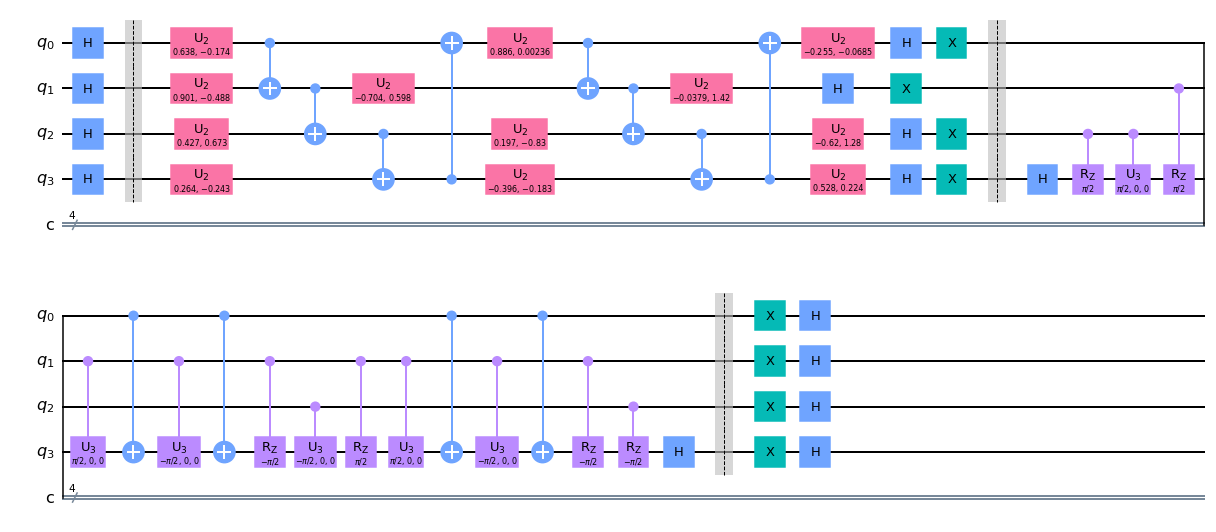

In [80]:
params = loadParams('toy', 'vqc', 10)
targetCircuit = QuantumCircuit(4, 4)
fullCircuitVQC = inputCircuit.compose(getVQCCircuit(targetCircuit, 4, params, [0, 1, 2, 3])).compose(diffuserCircuit)
fullCircuitVQC.draw(output='mpl')

In [44]:
fullCircuitVQC.measure([0, 1, 2, 3], [0, 1, 2, 3])

In [49]:
# expected = {"0010":1, "0011":1, "0101":1, "0111":1, "1011":1, "1101": 1}
job = execute(fullCircuitVQC, simulator, shots = 1000)
results = job.result()
counts = results.get_counts(fullCircuitVQC)
print(counts)

{'1011': 120, '0010': 143, '0011': 165, '1010': 11, '0001': 36, '0101': 160, '0111': 131, '1111': 14, '1101': 108, '1001': 15, '0110': 21, '0000': 18, '1000': 31, '1110': 16, '0100': 7, '1100': 4}


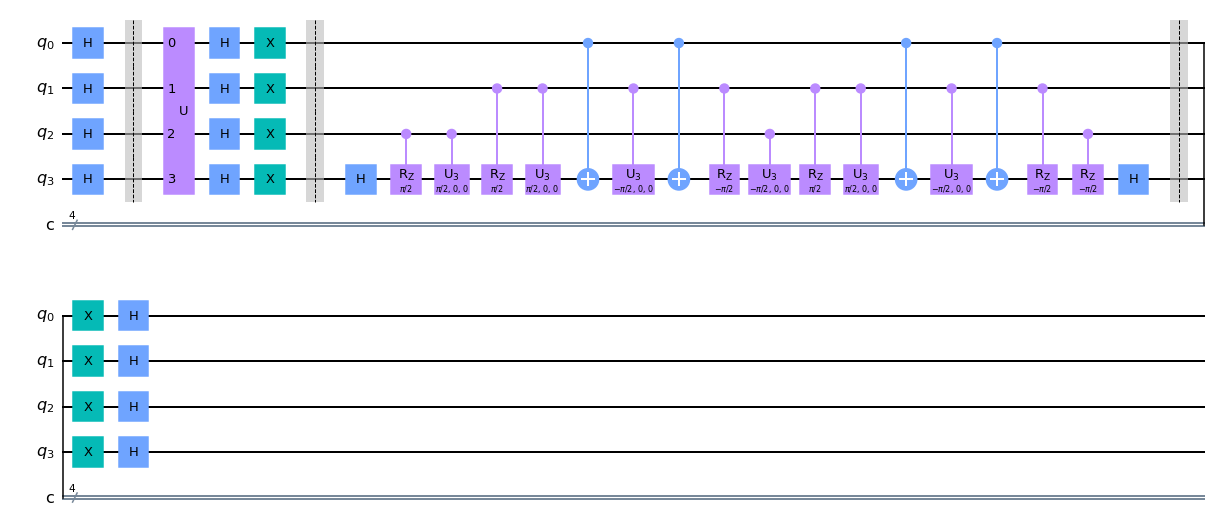

In [55]:
params = loadParams('toy', 'unitary', 6)
inputC = inputCircuit.copy()
inputC.append(buildU(4, params), [0, 1, 2, 3])
fullCircuitUnitary = inputC.compose(diffuserCircuit)
fullCircuitUnitary.draw(output='mpl')

In [54]:
fullCircuitUnitary.measure([0, 1, 2, 3], [0, 1, 2, 3])

In [51]:
# expected = {"0010":1, "0011":1, "0101":1, "0111":1, "1011":1, "1101": 1}
job = execute(fullCircuitUnitary, simulator, shots = 1000)
results = job.result()
counts = results.get_counts(fullCircuitUnitary)
print(counts)

{'0011': 163, '1101': 146, '1011': 164, '0010': 168, '0111': 161, '0101': 145, '1111': 9, '0001': 6, '1001': 2, '0110': 16, '0100': 12, '0000': 1, '1110': 5, '1100': 1, '1010': 1}


In [38]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [39]:
palette = {
    'unitary': '#AAAAFF', 'vqc': '#66CC99', 
}

In [40]:
def getCounts(circuit, shots=10000):
    circuit = circuit.copy()
    circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])
    
    job = execute(circuit, simulator, shots = shots)
    results = job.result()
    counts = results.get_counts(circuit)
    
    return counts

In [41]:
params = loadParams('toy', 'unitary', 6)
inputC = inputCircuit.copy()
inputC.append(buildU(4, params), [0, 1, 2, 3])
fullCircuitUnitary = inputC.compose(diffuserCircuit)

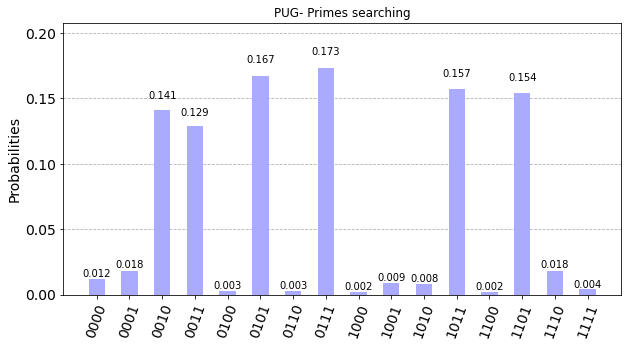

In [42]:
plot_histogram(getCounts(fullCircuitUnitary, shots=1000), figsize=(10,5), color=palette['unitary'], title="PUG- Primes searching")

In [221]:
params = loadParams('toy', 'vqc', 7)
targetCircuit = QuantumCircuit(4, 4)
fullCircuitVQC = inputCircuit.compose(getVQCCircuit(targetCircuit, 4, qol_vqc.params[-1], [0, 1, 2, 3])).compose(diffuserCircuit)

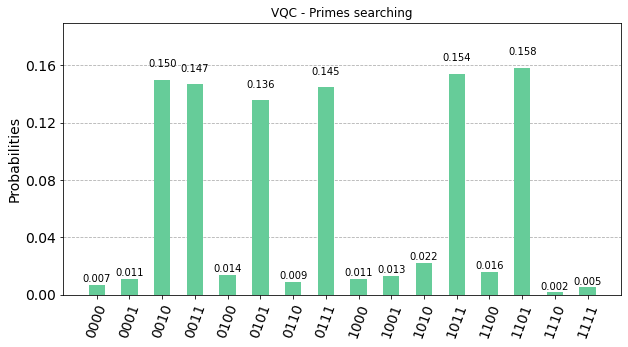

In [240]:
plot_histogram(getCounts(fullCircuitVQC, shots=1000), figsize=(10,5), color=palette['vqc'],  title="VQC - Primes searching")